In [29]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

def decision_tree(X_train, X_test, y_train, max_depth):    
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=123)
    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)
    return tree, y_pred

from sklearn.ensemble import RandomForestClassifier

def random_forest(X_train, X_test, y_train, n_estimators, max_depth):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=123)
    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)
    return rf_model, y_pred_rf

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

def xboost(X_train, X_test, y_train, y, n_estimators, max_depth):
    encoder = LabelEncoder()
    encoder.fit(y)
    y_train_labeled = encoder.transform(y_train)

    xgb = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth)
    xgb.fit(X_train, y_train_labeled)

    y_pred_xgb_labeled = xgb.predict(X_test)
    y_pred_xgb = encoder.inverse_transform(y_pred_xgb_labeled)
    return xgb, y_pred_xgb

from sklearn.ensemble import BaggingClassifier

def bagging(X_train, X_test, y_train, n_estimators):
    model = BaggingClassifier(n_estimators=n_estimators, random_state=123)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return model, y_pred

def score(model, test):
    return sys.getsizeof(pickle.dumps(model[0])), accuracy_score(test, model[1])

x_columns = ('Transportation expense','Distance from Residence to Work', 'Service time',
             'Work load Average/day ','Hit target','Disciplinary failure', 'Education',
             'Son','Social drinker','Social smoker','Pet','Weight','Height','Body mass index')
data = pd.read_csv('/home/lpo/absenteeism.csv', sep=';').drop_duplicates(subset=('Age', *x_columns))
X = pd.DataFrame(data, columns = x_columns)
y = pd.Series(data['Age']).to_numpy()

# data = pd.read_csv('/home/lpo/CancerProstateSurvival.csv', sep=',')
# data = data[data['patient.days_to_birth'].notnull()]
# X = pd.DataFrame({
#     'times': data['times'].map(int),
#     'patient.days_to_birth': data['patient.days_to_birth'].map(int),
#     'patient.vital_status': LabelEncoder().fit_transform(data['patient.vital_status']),
#     'patient.drugs.drug.therapy_types.therapy_type': LabelEncoder().fit_transform(data['patient.drugs.drug.therapy_types.therapy_type']),
#     'patient.stage_event.pathologic_stage': LabelEncoder().fit_transform(data['patient.stage_event.pathologic_stage']),
# })
# y = LabelEncoder().fit_transform(data['patient.stage_event.tnm_categories.pathologic_categories.pathologic_t'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y.size)

407


In [20]:
dt = decision_tree(X_train, X_test, y_train, 11)
dts, dta = score(dt, y_test)

print("Drzewo decyzyjne - dokładność:", dta)
print("Drzewo decyzyjne - rozmiar w bajtach:", dts)
print(y_test[0:20])
print(dt[1][0:20])

Drzewo decyzyjne - dokładność: 0.36054421768707484
Drzewo decyzyjne - rozmiar w bajtach: 32045
[3 2 4 2 2 4 0 3 2 2 3 2 4 4 2 3 4 3 3 3]
[2 1 4 2 4 3 4 2 3 3 3 2 4 3 2 3 3 2 3 4]


In [9]:
rf = random_forest(X_train, X_test, y_train, 5, 5)
rfs, rfa = score(rf, y_test)

print("Random Forest - dokładność:", rfa)
print("Random Forest - rozmiar w bajtach:", rfs)
print(y_test[0:20])
print(rf[1][0:20])

Random Forest - dokładność: 0.41496598639455784
Random Forest - rozmiar w bajtach: 29892
[3 2 4 2 2 4 0 3 2 2 3 2 4 4 2 3 4 3 3 3]
[4 2 4 3 3 3 2 3 3 3 3 3 3 4 3 3 3 3 3 4]


In [15]:
xb = xboost(X_train, X_test, y_train, y, 4, 2)
xbs, xba = score(xb, y_test)

print("Boosting - dokładność:", xba)
print("Boosting - rozmiar w bajtach:", xbs)
print(y_test[0:20])
print(xb[1][0:20])

Random Forest - dokładność: 0.4421768707482993
Random Forest - rozmiar w bajtach: 28862
[3 2 4 2 2 4 0 3 2 2 3 2 4 4 2 3 4 3 3 3]
[3 2 4 3 3 2 3 3 2 3 3 3 3 3 2 3 3 3 3 3]


In [8]:
bg = bagging(X_train, X_test, y_train, 1)
bgs, bga = score(bg, y_test)

print("Bagging - dokładność:", bga)
print("Bagging - rozmiar w bajtach:", bgs)
print(y_test[0:20])
print(bg[1][0:20])

Random Forest - dokładność: 0.35374149659863946
Random Forest - rozmiar w bajtach: 30283
[3 2 4 2 2 4 0 3 2 2 3 2 4 4 2 3 4 3 3 3]
[2 0 4 3 2 3 3 2 3 1 3 4 4 4 3 2 2 4 3 4]


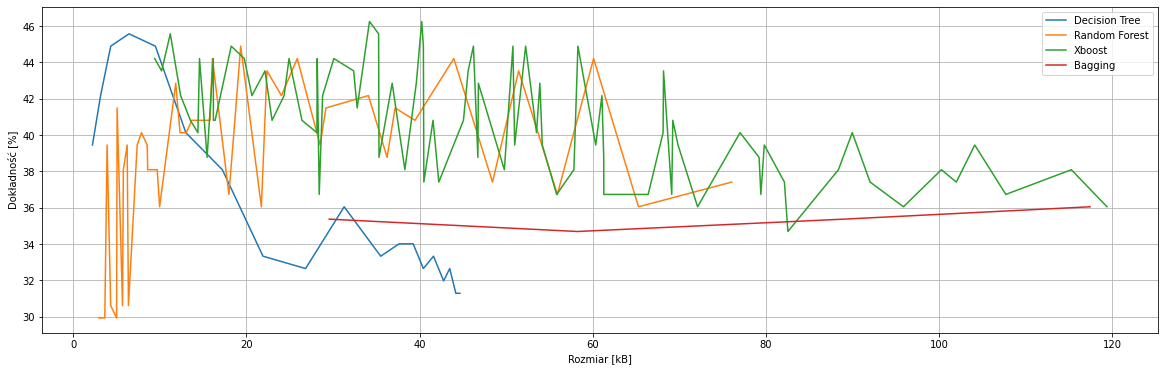

In [25]:
def norm(l):
    return np.transpose(list(map(lambda x: [x[0] / 1024, x[1] * 100], l)))

to = norm([score(decision_tree(X_train, X_test, y_train, i), y_test) for i in range(2, 21)])

rfo = []
for i in range(2, 8):
    for j in range(1, 8):
        rfo.append(score(random_forest(X_train, X_test, y_train, i, j), y_test))
rfo = norm(sorted(rfo))

xbo = []
for i in range(1, 10):
    for j in range(1, 10):
        xbo.append(score(xboost(X_train, X_test, y_train, y, i, j), y_test))
xbo = norm(sorted(xbo))

bgo = norm([score(bagging(X_train, X_test, y_train, i), y_test) for i in range(1, 5)])

plt.figure(figsize=(20, 6))
plt.plot(to[0], to[1], label="Decision Tree")
plt.plot(rfo[0], rfo[1], label="Random Forest")
plt.plot(xbo[0], xbo[1], label="Xboost")
plt.plot(bgo[0], bgo[1], label="Bagging")
plt.legend()
plt.xlabel("Rozmiar [kB]")
plt.ylabel("Dokładność [%]")
plt.grid(True)
plt.show()